In [15]:
#202331127_Muh Qhofi Rafiatul
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#202331127_Muh Qhofi Rafiatul
image = cv2.imread('parkiran.jpg')
image.shape

(799, 1200, 3)

## Mengubah ke GreyScale

Text(0.5, 1.0, 'GRAY')

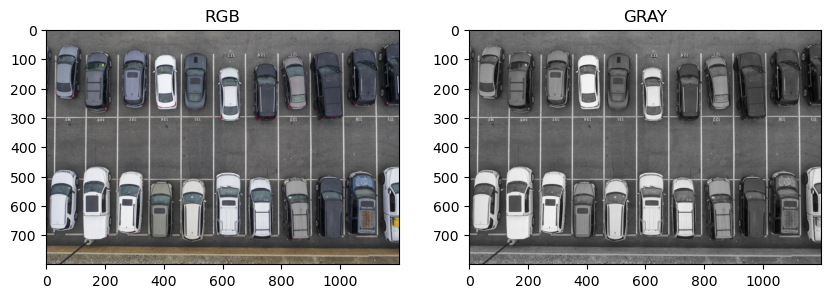

In [19]:
#202331127_Muh Qhofi Rafiatul
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots(1,2, figsize=(10,10))

ax = axs.ravel()

ax[0].imshow(image)
ax[0].set_title("RGB")

ax[1].imshow(img_gray,cmap = 'gray')
ax[1].set_title("GRAY")

## Mendeteksi Ambang Batas Dari Tepi

Text(0.5, 1.0, 'EDGES')

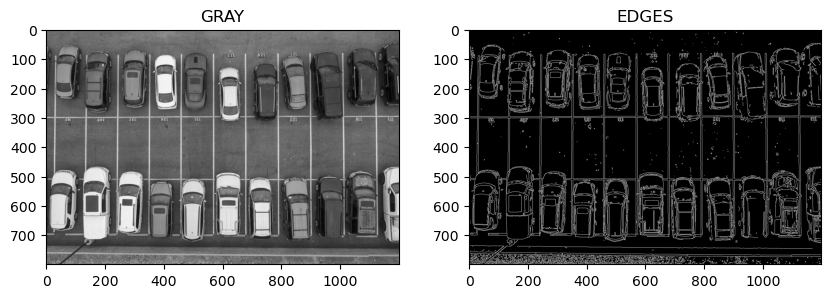

In [21]:
#202331127_Muh Qhofi Rafiatul
edges = cv2.Canny(image, 100,150)
fig, axs = plt.subplots(1,2, figsize=(10,10))

ax = axs.ravel()

ax[0].imshow(img_gray,cmap = 'gray')
ax[0].set_title("GRAY")

ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title("EDGES")

In [23]:
#202331127_Muh Qhofi Rafiatul
lines = cv2.HoughLinesP(edges,1,np.pi/180,30, maxLineGap=10)
img_line = image.copy()
for line in lines :
    x1,y1,x2,y2 = line[0]
    cv2.line(img_line, (x1,y1), (x2,y2), (100,80,255),1)

Text(0.5, 1.0, 'EDGES')

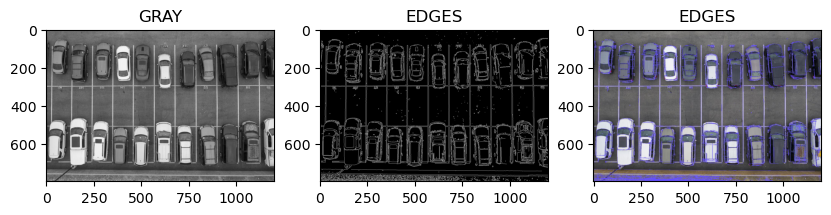

In [25]:
#202331127_Muh Qhofi Rafiatul
fig, axs = plt.subplots(1,3, figsize=(10,10))

ax = axs.ravel()

ax[0].imshow(img_gray,cmap = 'gray')
ax[0].set_title("GRAY")

ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title("EDGES")

ax[2].imshow(img_line,cmap = 'gray')
ax[2].set_title("EDGES")

## Metode geomatrik

## Baca gambar

In [240]:
#202331127_Muh Qhofi Rafiatul
img_trc = cv2.imread('truck.jpg')
rows, cols, _ = img_trc.shape
print('img shape: ', img_trc.shape)

img shape:  (1080, 1920, 3)


## Cara 1

Text(0.5, 1.0, 'resize img')

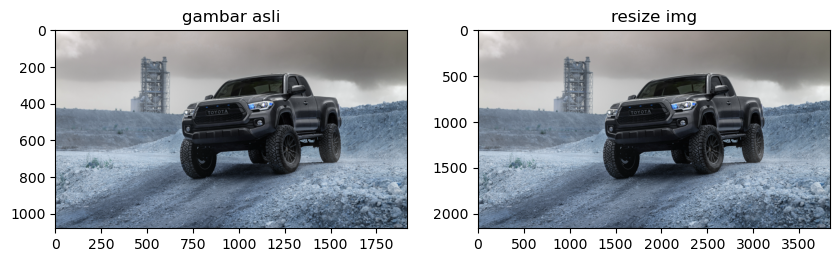

In [242]:
#202331127_Muh Qhofi Rafiatul
res = cv2.resize(img_trc, None, fx=2, fy=2,
                 interpolation=cv2.INTER_CUBIC)
fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_trc)
ax[0].set_title('gambar asli')

ax[1].imshow(res)
ax[1].set_title('resize img')

## Cara 2

Text(0.5, 1.0, 'resize img')

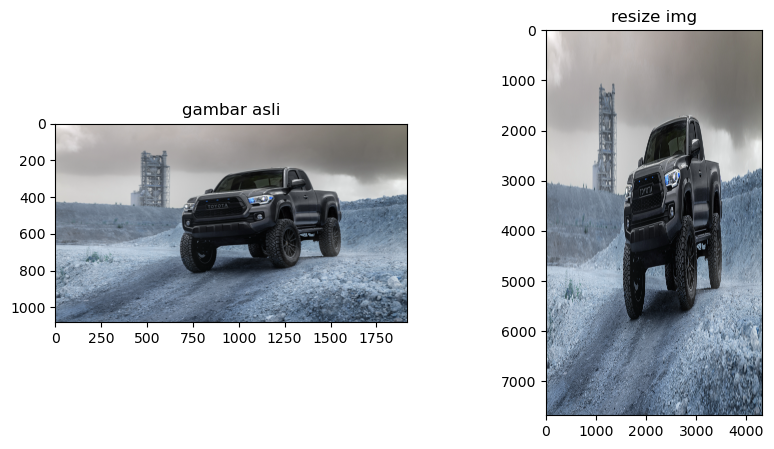

In [244]:
#202331127_Muh Qhofi Rafiatul
tinggi, lebar = img_trc.shape[:2]
res2 = cv2.resize(img_trc, (4*tinggi, 4*lebar),
                 interpolation=cv2.INTER_CUBIC)

fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_trc)
ax[0].set_title('gambar asli')

ax[1].imshow(res2)
ax[1].set_title('resize img')


## Perputaran citra / rotasi gambar

In [227]:
#202331127_Muh Qhofi Rafiatul
img_trc = cv2.imread('truck.jpg',0)
rows, cols, = img_trc.shape
print('img shape: ', img_trc.shape)

img shape:  (1080, 1920)


## Cara 1

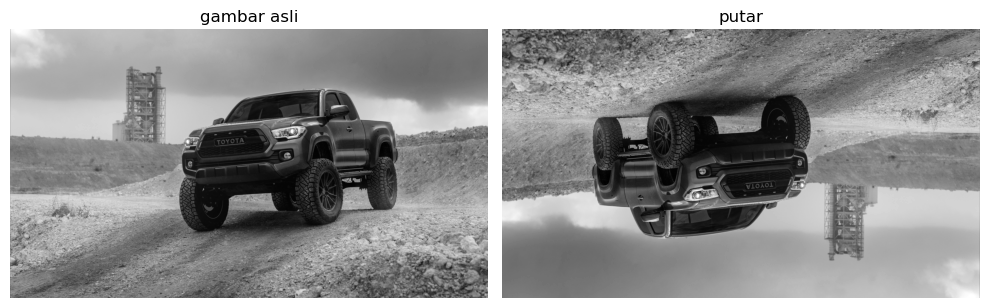

In [230]:
#202331127_Muh Qhofi Rafiatul
M = cv2.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0),180,1)

img_putar = cv2.warpAffine(img_trc, M, (cols, rows))

fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_trc, cmap='gray')
ax[0].set_title('gambar asli')

ax[1].imshow(img_putar, cmap='gray')
ax[1].set_title('putar')

for a in axs:
    a.axis('off')

plt.tight_layout()
plt.show()

## Cara 2

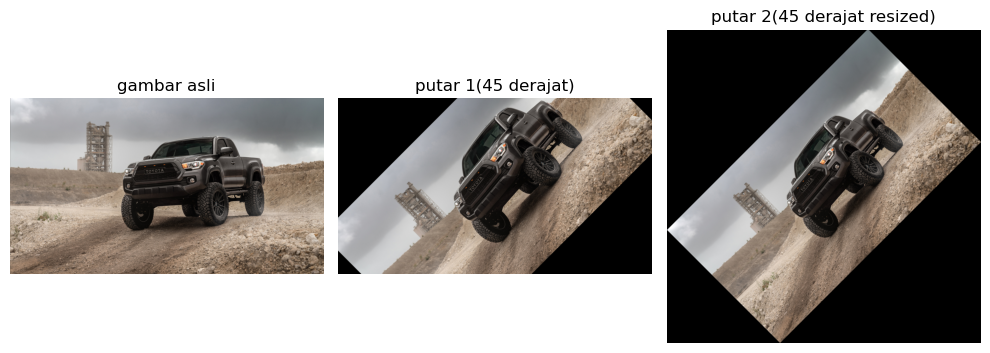

In [232]:
#202331127_Muh Qhofi Rafiatul
from skimage import io, transform

img_trc2 = io.imread('truck.jpg')

rotated = transform.rotate(img_trc2, 45, resize=False)
rotated2 = transform.rotate(img_trc2, 45, resize=True)

fig, axs = plt.subplots(1,3, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_trc2, cmap='gray')
ax[0].set_title('gambar asli')

ax[1].imshow(rotated, cmap='gray')
ax[1].set_title('putar 1(45 derajat)')

ax[2].imshow(rotated2, cmap='gray')
ax[2].set_title('putar 2(45 derajat resized)')

for a in axs:
    a.axis('off')

plt.tight_layout()
plt.show()

## Pengaplikasian

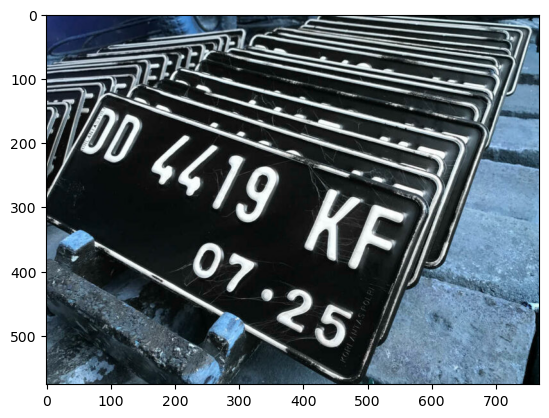

In [233]:
#202331127_Muh Qhofi Rafiatul
t = cv2.imread('plat.jpg')
plt.imshow(t)

In [256]:
#202331127_Muh Qhofi Rafiatul
src = np.array([
    [1,3],
    [765,2],
    [765,572],
    [1,570]
])
crp = np.array([
    [89,129],
    [577,300],
    [471,561],
    [0,294]
])

crp2 = np.array([
    [241,335],
    [501,453],
    [457,545],
    [202,407]
])

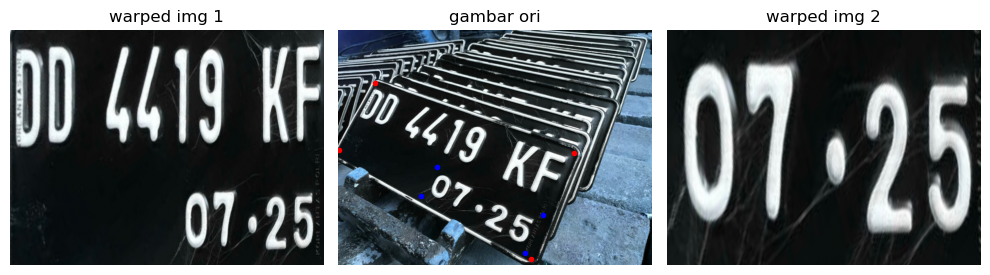

In [258]:
#202331127_Muh Qhofi Rafiatul
tform = transform.ProjectiveTransform()
tform.estimate(src, crp)

tform2 = transform.ProjectiveTransform()
tform2.estimate(src, crp2)

warped = transform.warp(t, tform, output_shape=(572,765))
warped2 = transform.warp(t, tform2, output_shape=(572,765))

fig, axs = plt.subplots(1,3, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(warped)
ax[0].set_title('warped img 1')

ax[1].imshow(t)
ax[1].plot(crp[:,0], crp[:,1], '.r')
ax[1].plot(crp2[:,0], crp2[:,1], '.b')
ax[1].set_title('gambar ori')

ax[2].imshow(warped2)
ax[2].set_title('warped img 2')

for a in axs:
    a.axis('off')

plt.tight_layout()
plt.show()